# PageRank

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Макрушин С.В. "Случайные блуждания на графах"
* Документация:
    * https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.link_analysis.pagerank_alg.pagerank.html
    * https://networkx.org/documentation/stable/reference/algorithms/centrality.html
    * https://numpy.org/doc/stable/reference/generated/numpy.linalg.eig.html

## Вопросы для совместного обсуждения

1\. Обсудите принцип работы алгоритма PageRank и подходы к его реализации.

In [ ]:
import networkx as nx

In [ ]:
G = nx.cycle_graph(5, create_using=nx.DiGraph)
nx.draw(G)

In [ ]:
pr = nx.pagerank(G, )
pr

{0: 0.2, 1: 0.2, 2: 0.2, 3: 0.2, 4: 0.2}

In [ ]:
import numpy as np

G = nx.cycle_graph(5, create_using=nx.Graph)
A = nx.adjacency_matrix(G).toarray()
A

array([[0, 1, 0, 0, 1],
       [1, 0, 1, 0, 0],
       [0, 1, 0, 1, 0],
       [0, 0, 1, 0, 1],
       [1, 0, 0, 1, 0]])

In [ ]:
eigenvalues, eigenvectors = np.linalg.eig(A)

In [ ]:
eigenvalues

array([-1.61803399,  0.61803399,  2.        , -1.61803399,  0.61803399])

In [ ]:
np.real(eigenvalues)

array([-1.61803399,  0.61803399,  2.        , -1.61803399,  0.61803399])

In [ ]:
eigenvectors[:, 2]

array([-0.4472136, -0.4472136, -0.4472136, -0.4472136, -0.4472136])

## Задачи для самостоятельного решения

<p class="task" id="1"></p>

1\. Загрузите граф карате-клуба. Воспользовавшийся реализаций алгоритма PageRank из `networkx`, вычислите важность каждого узла в сети. Визуализируйте граф, отмасшабировав размер каждого узла пропорционально полученным значениям.

- [ ] Проверено на семинаре

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [2]:
G = nx.karate_club_graph()
pagerank = nx.pagerank(G)

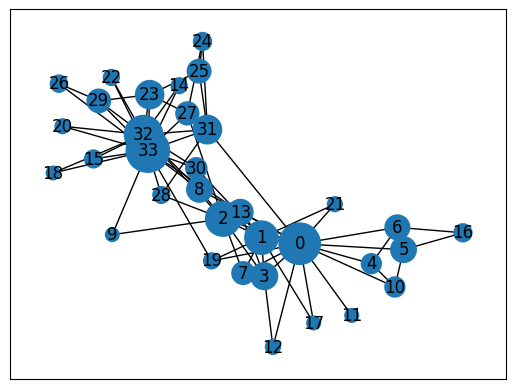

In [3]:
node_sizes = [pagerank[node] * 10000 for node in G.nodes()]
pos = nx.spring_layout(G)
nx.draw_networkx(G, pos, node_size=node_sizes, with_labels=True)
plt.show()

<p class="task" id="2"></p>

2\. Постройте несколько визуализаций графа в виде сетки, используя другие меры центральности:
- центральность по степени;
- центральность по посредничеству;
- центральность по близости;
- центральность по собственному вектору;
- центральность по PageRank.

На каждом рисунке сделайте размеры узлов пропорционально соответствующей мере центральности. Сравните результаты и сделайте выводы.

- [ ] Проверено на семинаре

In [4]:
G = nx.karate_club_graph()

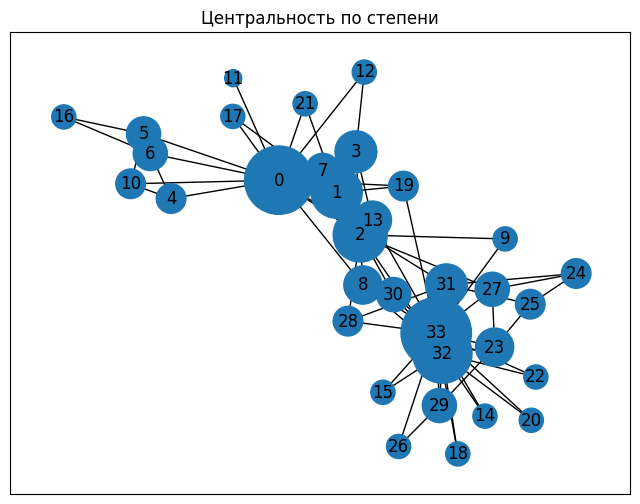

In [5]:
degree_centrality = nx.degree_centrality(G)
plt.figure(figsize=(8, 6))
node_sizes = [degree_centrality[node] * 5000 for node in G.nodes()]
pos = nx.spring_layout(G)
nx.draw_networkx(G, pos, node_size=node_sizes, with_labels=True)
plt.title("Центральность по степени")
plt.show()

Чем большей связи у узла, тем больше размер

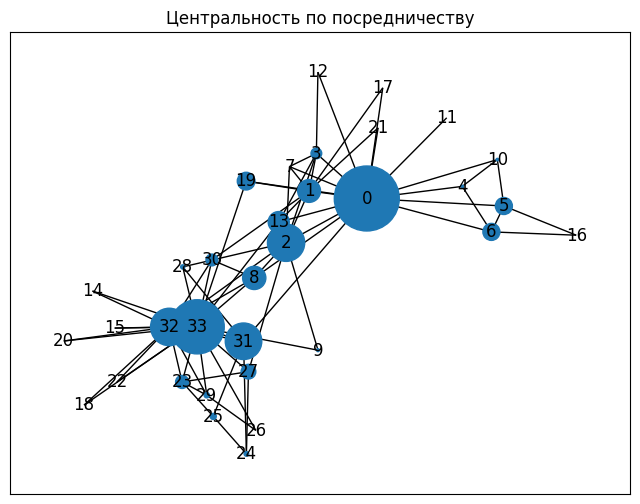

In [6]:
betweenness_centrality = nx.betweenness_centrality(G)
plt.figure(figsize=(8, 6))
node_sizes = [betweenness_centrality[node] * 5000 for node in G.nodes()]
pos = nx.spring_layout(G)
nx.draw_networkx(G, pos, node_size=node_sizes, with_labels=True)
plt.title("Центральность по посредничеству")
plt.show()

Чем больше роль в передаче информации между другими узлами в графе, тем больше размер узла

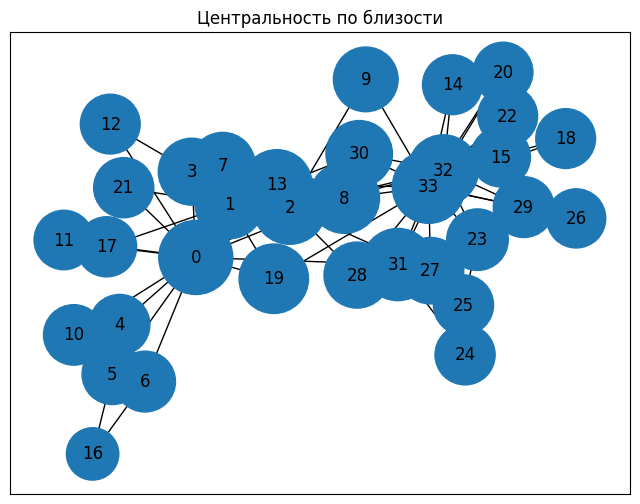

In [7]:
closeness_centrality = nx.closeness_centrality(G)
plt.figure(figsize=(8, 6))
node_sizes = [closeness_centrality[node] * 5000 for node in G.nodes()]
pos = nx.spring_layout(G)
nx.draw_networkx(G, pos, node_size=node_sizes, with_labels=True)
plt.title("Центральность по близости")
plt.show()

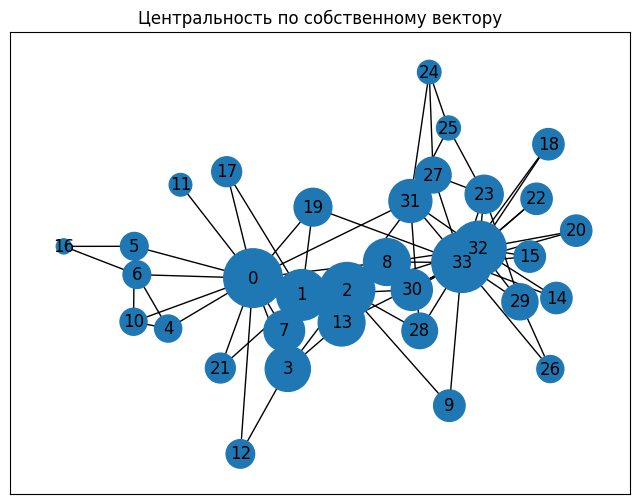

In [8]:
eigenvector_centrality = nx.eigenvector_centrality(G)
plt.figure(figsize=(8, 6))
node_sizes = [eigenvector_centrality[node] * 5000 for node in G.nodes()]
pos = nx.spring_layout(G)
nx.draw_networkx(G, pos, node_size=node_sizes, with_labels=True)
plt.title("Центральность по собственному вектору")
plt.show()

In [ ]:
Чем больше узел связан с важными узлами, тем больше его размер

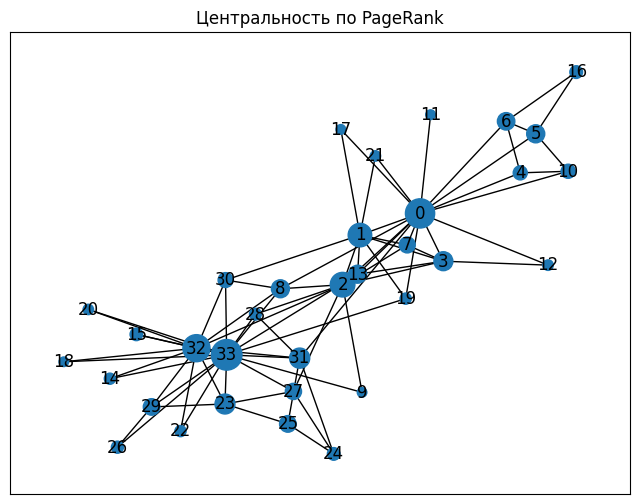

In [9]:
pagerank = nx.pagerank(G)
plt.figure(figsize=(8, 6))
node_sizes = [pagerank[node] * 5000 for node in G.nodes()]
pos = nx.spring_layout(G)
nx.draw_networkx(G, pos, node_size=node_sizes, with_labels=True)
plt.title("Центральность по PageRank")
plt.show()

Узлы с большим количеством входящих связей от других важных узлов получают более высокий PageRank

Самые большие размеры узлов у центральности по близости

<p class="task" id="3"></p>

3\. Исследуйте, как влияют различные значение параметров `alpha` и `personalization` на результат работы алгоритма. Визуализируйте результаты аналогично предыдущим заданиям и прокомментируйте результат.

- [ ] Проверено на семинаре

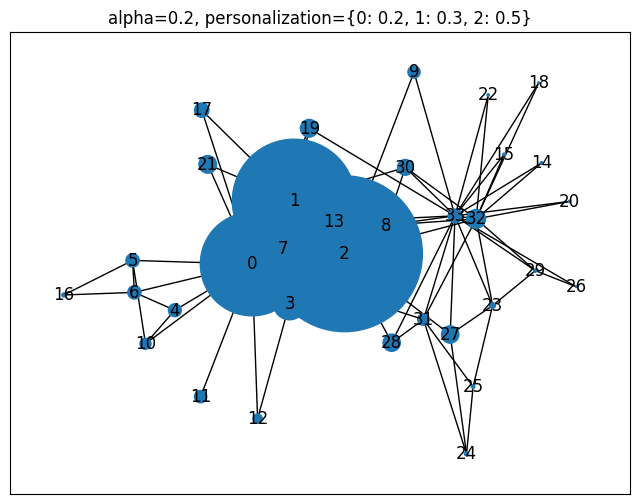

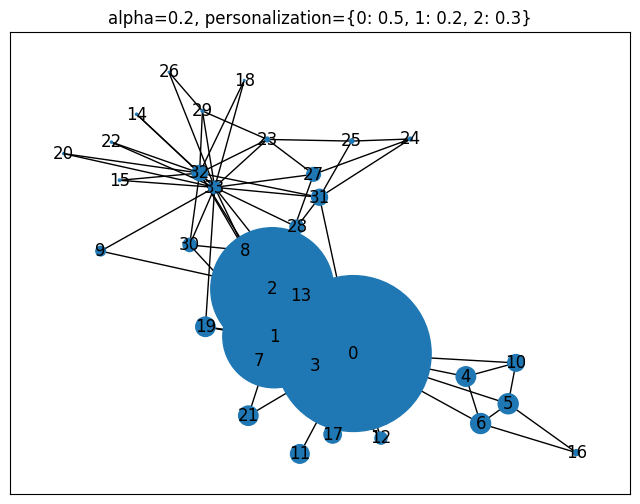

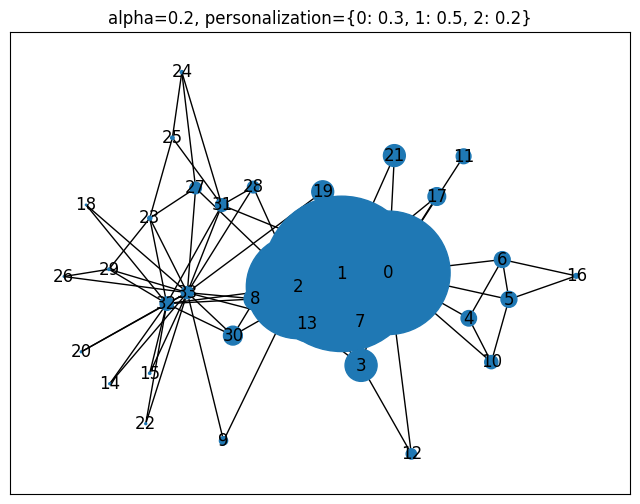

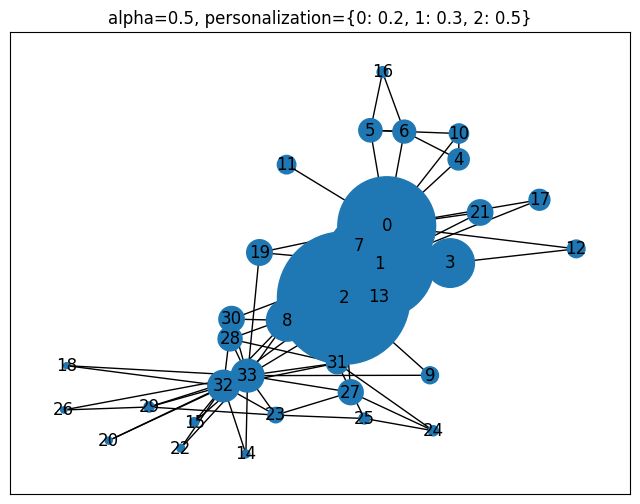

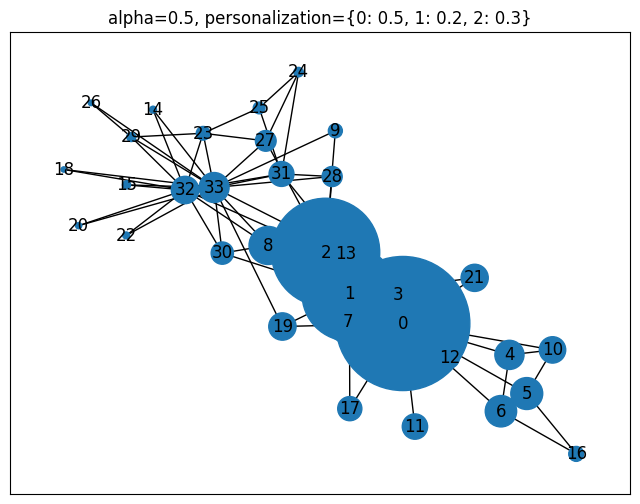

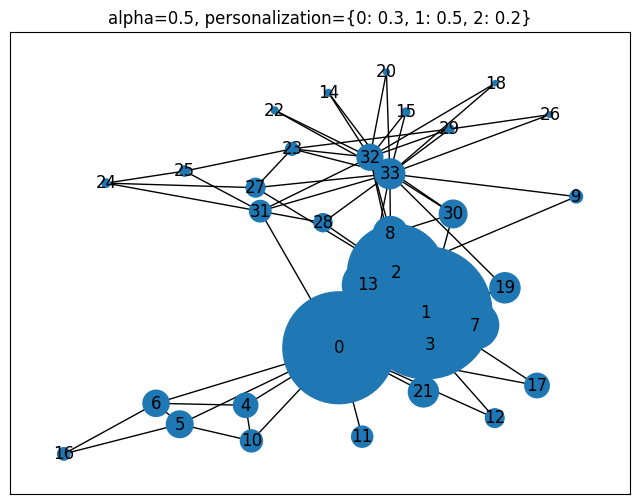

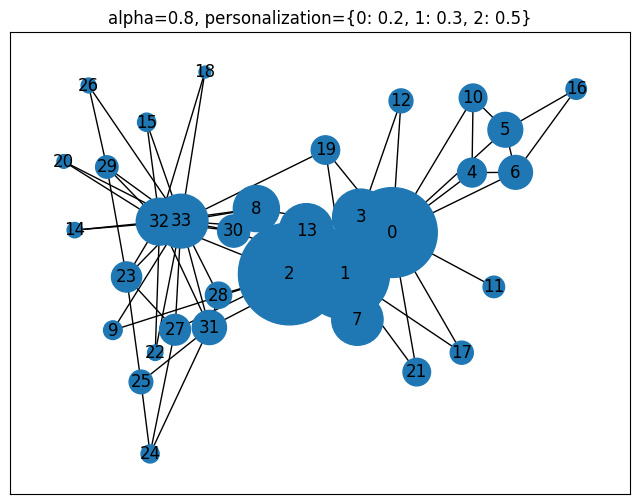

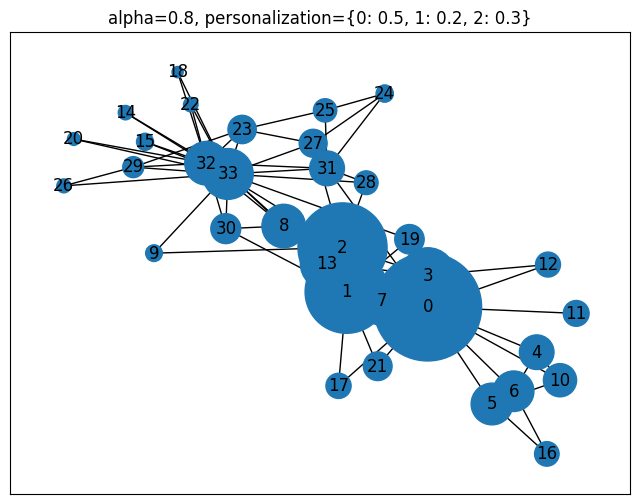

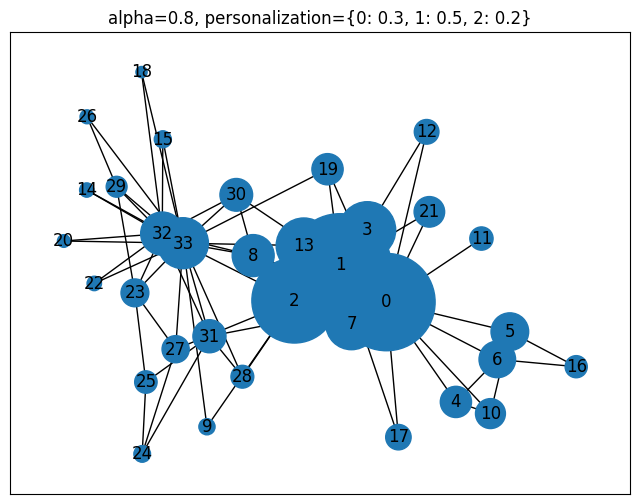

In [10]:
G = nx.karate_club_graph()
alpha_values = [0.2, 0.5, 0.8]
personalization_values = [{0: 0.2, 1: 0.3, 2: 0.5}, {0: 0.5, 1: 0.2, 2: 0.3}, {0: 0.3, 1: 0.5, 2: 0.2}]
for alpha in alpha_values:
    for personalization in personalization_values:
        plt.figure(figsize=(8, 6))
        pagerank = nx.pagerank(G, alpha=alpha, personalization=personalization)
        node_sizes = [pagerank[node] * 30000 for node in G.nodes()]
        pos = nx.spring_layout(G)
        nx.draw_networkx(G, pos, node_size=node_sizes, with_labels=True)
        plt.title(f"alpha={alpha}, personalization={personalization}")
        plt.show()

Вывод: чем больше значения параметров, тем больше размеры узлов

<p class="task" id="4"></p>

4\. Реализуйте алгоритм PageRank с параметром затухания $\alpha=0.9$.

Загрузите граф карате-клуба и сделайте его ориентированным. Найдите стохастическую матрицу переходов $\mathbf{P}$.

$$\mathbf{P}=\mathbf{D}^{-1}\mathbf{A}$$

Модифицируйте матрицу $\mathbf{P}$:

$$\mathbf{P}' = \alpha \mathbf{P} + (1-\alpha)\frac{1}{n}\mathbf{E}$$
$$\mathbf{M}=(\mathbf{P}')^{\top}$$

где $\mathbf{E}$ - матрица размера `NxN`, состоящая из единиц.

$\mathbf{p}^0 = [\frac{1}{N}..., \frac{1}{N}]$
Получите вектор $\mathbf{p}^\infty = \mathbf{pr}^{iter}$, используя итеративную процедуру

$$\mathbf{p}^{t+1}=\mathbf{M}\mathbf{p}^t$$

Процесс заканчивается, когда $||\mathbf{p}^{t+1} - \mathbf{p}^{t}|| < \epsilon $

Выведите полученный вектор стационарного состояния на экран.
Вызовите `nx.pagerank` с соответствующими параметрами и докажите, что полученные векторы совпадают.

- [ ] Проверено на семинаре

In [11]:
G = nx.karate_club_graph().to_directed()
a = nx.adjacency_matrix(G).toarray()
d = np.diag(np.sum(a, axis=1))
p = np.linalg.inv(d) @ a

In [12]:
alpha = 0.9
n = G.number_of_nodes()
e1 = np.ones((n, n))
prime = alpha * p + (1 - alpha) * (1 / n) * e1
m = prime.T

In [13]:
p0 = np.ones(n) / n

In [15]:
epsilon = 1e-8
pt = p0
while True:
    pt_plus = m @ pt
    if np.linalg.norm(pt_plus - pt) < epsilon:
        p_infinity = pt_plus
        break
    pt = pt_plus

In [16]:
print("Вектор стационарного состояния (p_infinity):")
print(p_infinity)

Вектор стационарного состояния (p_infinity):
[0.08988772 0.05913749 0.06546514 0.03776398 0.01970144 0.03322245
 0.03092854 0.02694096 0.03436443 0.00844129 0.01984993 0.00871967
 0.01053194 0.03448906 0.01218335 0.01589805 0.01577198 0.00862881
 0.00849837 0.01232146 0.010326   0.01046411 0.01219821 0.04234102
 0.01604281 0.02902514 0.01444809 0.0273878  0.0139083  0.02813854
 0.02316918 0.04295197 0.07779412 0.09905864]


In [17]:
pagerank = nx.pagerank(G, alpha=alpha, tol=epsilon)
pagerank_values = np.array([pagerank[node] for node in G.nodes()])
pagerank_values

array([0.08988784, 0.05913753, 0.06546517, 0.03776402, 0.01970148,
       0.03322254, 0.03092861, 0.02694099, 0.03436441, 0.00844128,
       0.01984997, 0.00871968, 0.01053195, 0.03448908, 0.01218334,
       0.01589803, 0.01577202, 0.00862882, 0.00849836, 0.01232147,
       0.01032599, 0.01046412, 0.0121982 , 0.04234095, 0.01604279,
       0.02902509, 0.01444807, 0.02738777, 0.01390829, 0.0281385 ,
       0.02316917, 0.04295192, 0.07779402, 0.09905853])

In [18]:
print("\nСовпадение полученных векторов:")
print(np.allclose(p_infinity, pagerank_values))


Совпадение полученных векторов:
True


<p class="task" id="5"></p>

5\. Вычислите коэффициенты PageRank при помощи задачи нахождения собственного вектора матрицы $\mathbf{M}$ $\mathbf{pr}^{eig}$, соответствующего собственному числу 1.

Покажите, что $\mathbf{pr}^{eig}$ и $\mathbf{pr}^{iter}$ оба являются с.в. матрицы $\mathbf{M}$.

- [ ] Проверено на семинаре